In [1]:
""" 导入numpy和matplotlib """
import numpy as np
import matplotlib.pyplot as plt
""" 导入sciki-learn的高斯过程模块 """
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
""" 导入joblib存储模块 """
import joblib


In [22]:
""" 创建训练集 """
data_train = np.loadtxt('D:/Program Files/Pycharm/Projects/基于强化学习的球杆系统人机协作控制/GPR/改进版training_data.txt')
feature_train = data_train[:, :5]  # 数据集前5列作为特征（误差，距离，速度，角度，上一时刻速度）
feature_train = feature_train[0:2000]
print(feature_train)


[[ 0.2869238   0.7869238   0.          0.02756194  0.        ]
 [ 0.27692114  0.77692114 -0.08967911  0.02636583  0.        ]
 [ 0.25845524  0.75845524 -0.12401017  0.02877911 -0.00939038]
 ...
 [-0.01305088  0.48694912  0.03735991  0.01883588 -0.00742678]
 [-0.0087958   0.4912042   0.03594141  0.02645484 -0.00634718]
 [-0.00749502  0.49250498 -0.00300563  0.03444315  0.01550337]]


In [17]:
# feature_train = feature_train[0:2000]
# label_x = data_train[:, -2]  # 数据集第5列作为x轴速度的标签
# label_x = label_x[0:2000]
label_z = data_train[:, -1]  # 数据集第6列作为z轴速度的标签
label_z = label_z[0:2000]
print(label_z)

[-0.         -0.          0.0233113  ... -0.00429173  0.06609377
  0.0326374 ]


In [ ]:
""" 创建测试集 """
data_test = np.loadtxt('D:/Program Files/Pycharm/Projects/基于强化学习的球杆系统人机协作控制/GPR/改进版training_data.txt')
feature_test = data_test[:, :5]
feature_test = feature_test[2000:2100]  # 取数据作为测试集
print(feature_test)

In [23]:
"""实际速度 """
actual_x = data_train[:, -2]
actual_x = actual_x[2000:2100]
actual_z = data_train[:, -1]
actual_z = actual_z[2000:2100]


[[-8.68525235e-03  4.91314748e-01 -2.49921158e-02  3.22413380e-02
  -1.20486587e-03]
 [-1.43417625e-02  4.85658237e-01 -3.31681979e-02  2.07779640e-02
   8.50349832e-03]
 [-1.99621300e-02  4.80037870e-01 -3.16959816e-02  9.95573651e-03
  -5.50664710e-03]
 [-2.33772215e-02  4.76622778e-01 -2.61466759e-02  5.63444462e-03
  -8.36843457e-03]
 [-2.54624919e-02  4.74537508e-01 -1.05402432e-02  3.37949149e-03
   1.50297147e-03]
 [-2.58625502e-02  4.74137450e-01  1.27656971e-02  6.35205951e-03
   6.72016729e-04]
 [-2.39857823e-02  4.76014218e-01 -1.24319222e-03  1.29600925e-02
   6.60662707e-04]
 [-2.20101349e-02  4.77989865e-01  4.18825519e-03  2.00248654e-02
   4.90551515e-03]
 [-2.23997173e-02  4.77600283e-01 -1.30086965e-02  1.63237956e-02
   2.95257884e-02]
 [-2.28097514e-02  4.77190249e-01 -1.03154100e-02  6.72984492e-03
   2.74867633e-02]
 [-1.83222405e-02  4.81677759e-01  1.83172242e-02  6.27174019e-03
  -1.14688521e-03]
 [-1.13260309e-02  4.88673969e-01  4.47802088e-02  1.55072375e-02

In [4]:
"""实际速度 """
actual_x = data_train[:, -2]
actual_x = actual_x[2000:2100]
actual_z = data_train[:, -1]
actual_z = actual_z[2000:2100]


In [5]:
""" 创建核函数 """
# kernel = ConstantKernel(constant_value=0.2, constant_value_bounds=(1e-4, 1e4)) * RBF(length_scale=0.5, length_scale_bounds=(1e-4, 1e4))

' 创建核函数 '

In [6]:
# """ 创建高斯过程回归模型 """
# reg_x = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.01)
# reg_z = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)

In [7]:
# """ 训练x轴超参数 """
# reg_x.fit(feature_train, label_x)

In [8]:
# """ 将x轴超参数写入joblib储存 """
# gpr_x=reg_x.fit(feature_train, label_x)
# joblib.dump(gpr_x, 'D:/Program Files/Pycharm/Projects/基于强化学习的球杆系统人机协作控制/GPR/gpr_x.joblib')

In [9]:
# """ 训练z轴超参数 """
# reg_z.fit(feature_train, label_z)

In [10]:
# """ 将z轴超参数写入joblib储存 """
# gpr_z=reg_z.fit(feature_train, label_z)
# joblib.dump(gpr_z, 'D:/Program Files/Pycharm/Projects/基于强化学习的球杆系统人机协作控制/GPR/gpr_z.joblib')

In [11]:
""" 读取joblib中训练好的超参数 """
gpr_x = joblib.load('D:/Program Files/Pycharm/Projects/基于强化学习的球杆系统人机协作控制/GPR/gpr_x.joblib')
gpr_z = joblib.load('D:/Program Files/Pycharm/Projects/基于强化学习的球杆系统人机协作控制/GPR/gpr_z.joblib')

In [12]:
output_x, err_x  = gpr_x.predict(feature_test, return_std=True)
output_z, err_z  = gpr_z.predict(feature_test, return_std=True)
result_x = output_x.ravel()
result_z = output_z.ravel()


In [13]:
uncertainty_x = 1.96 * err_x
uncertainty_z = 1.96 * err_z


In [14]:
""" 添加字体 """
font1 = {'family' : 'Times new Roman','size'   : 15,
}
font2 = {'family' : 'FangSong',
'size'   : 15,
}

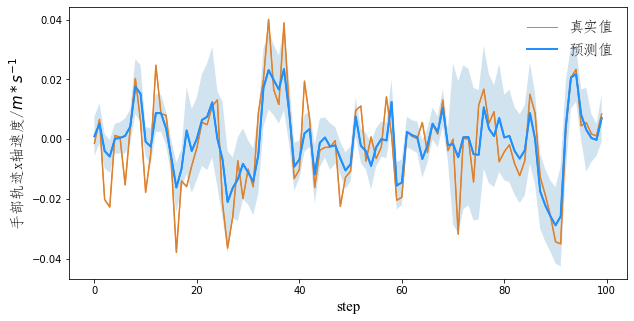

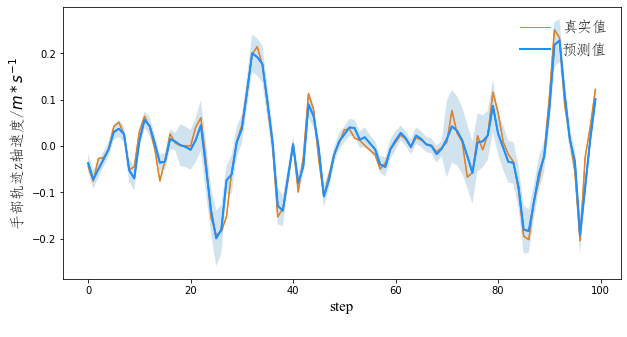

In [15]:
plt_x = np.arange(0, 100, 1).reshape(-1, 1)
plt_z = np.arange(0, 100, 1).reshape(-1, 1)

plt.figure(figsize=(10, 5))
plt.plot(plt_x, result_x)
plt.plot(plt_x, actual_x)
plt.fill_between(plt_x.flatten(), result_x + uncertainty_x, result_x - uncertainty_x, alpha=0.2)

plt.plot(np.arange(len(actual_x)), actual_x, linewidth=1.0, label='真实值', c='peru')
plt.plot(np.arange(len(result_x)), result_x, linewidth=2.0, label='预测值', c="dodgerblue")

plt.legend(loc='upper right', prop=font2, frameon=False)
plt.xlabel('step', fontdict=font1)
plt.ylabel('手部轨迹x轴速度/$m*s^{-1}$', fontdict=font2)

plt.show()

plt.figure(figsize=(10, 5))
plt.plot(plt_z, result_z)
plt.plot(plt_z, actual_z)
plt.fill_between(plt_z.flatten(), result_z + uncertainty_z, result_z - uncertainty_z, alpha=0.2)

plt.plot(np.arange(len(actual_z)), actual_z, linewidth=1.0, label='真实值', c='peru')
plt.plot(np.arange(len(result_z)), result_z, linewidth=2.0, label='预测值', c="dodgerblue")

plt.legend(loc='upper right', prop=font2, frameon=False)
plt.xlabel('step\n', fontdict=font1)
plt.ylabel('手部轨迹z轴速度/$m*s^{-1}$', fontdict=font2)

plt.show()
